In [66]:
import pandas as pd
import numpy as np
import timeit
import seaborn as sns
from sklearn import metrics


In [67]:
df1 = pd.read_csv('adult+stretch.data') 
df2 = pd.read_csv('adult-stretch.data') 
df3 = pd.read_csv('yellow-small+adult-stretch.data') 
df4 = pd.read_csv('yellow-small.data') 
df = pd.concat([df1,df2,df3,df4])

# STEP - 2

In [68]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)
train = train.astype('category')
test = test.astype('category')
x_train = train[['YELLOW','SMALL','STRETCH','ADULT']]
x_test = test[['YELLOW','SMALL','STRETCH','ADULT']]
y_train = train[['T']]
y_test = test[['T']]

# STEP - 3

## KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
xtrain = train[['YELLOW','SMALL','STRETCH','ADULT']]
xtest = test[['YELLOW','SMALL','STRETCH','ADULT']]
ytrain = train[['T']]
ytest = test[['T']]
xtest = np.array(xtest.apply(lambda x: x.cat.codes))
xtrain = np.array(xtrain.apply(lambda x: x.cat.codes))
ytest = np.array(ytest.apply(lambda x: x.cat.codes)).ravel()
ytrain = np.array(ytrain.apply(lambda x: x.cat.codes)).ravel()

In [70]:
score = {}
for k in range(2,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    score[k] = metrics.accuracy_score(ytest,ypred)

In [71]:
score

{2: 0.6818181818181818,
 3: 0.6818181818181818,
 4: 0.6818181818181818,
 5: 0.6818181818181818,
 6: 0.5909090909090909,
 7: 0.5,
 8: 0.6818181818181818,
 9: 0.6818181818181818,
 10: 0.6818181818181818,
 11: 0.7727272727272727,
 12: 0.7727272727272727,
 13: 0.7727272727272727,
 14: 0.7727272727272727,
 15: 0.7727272727272727,
 16: 0.7272727272727273,
 17: 0.7727272727272727,
 18: 0.7272727272727273,
 19: 0.7272727272727273,
 20: 0.6363636363636364,
 21: 0.5909090909090909,
 22: 0.6363636363636364,
 23: 0.6363636363636364,
 24: 0.6363636363636364,
 25: 0.5454545454545454}


 Optimal value of k : 2 
 Accuracy = 68.18181818181817 %


              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.55      0.75      0.63         8

    accuracy                           0.68        22
   macro avg       0.68      0.70      0.68        22
weighted avg       0.72      0.68      0.69        22



 Time Taken = 0.001266499999928783


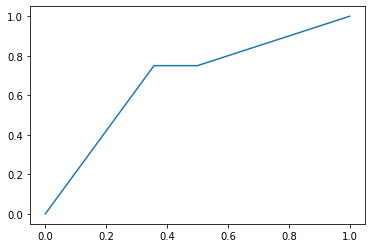

In [72]:
k = 2
print('\n Optimal value of k : {} \n Accuracy = {} %\n\n'.format(k,score[k]*100))
s = timeit.timeit()
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
e = timeit.timeit()
report = metrics.classification_report(ytest,ypred)
print(report)
print('\n\n Time Taken = {}'.format(e-s))
yscore = knn.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest,yscore,pos_label=1)
sns.lineplot(fpr,tpr)

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier


              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.55      0.75      0.63         8

    accuracy                           0.68        22
   macro avg       0.68      0.70      0.68        22
weighted avg       0.72      0.68      0.69        22



 Time Taken = 0.00439509999978327


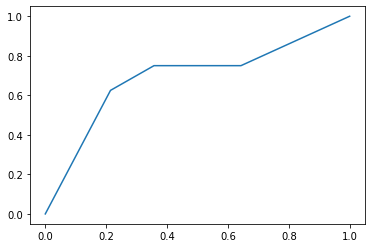

In [85]:
s = timeit.timeit()
clf = DecisionTreeClassifier(random_state=0)
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
e = timeit.timeit()
report = metrics.classification_report(ytest,ypred)
print(report)
print('\n\n Time Taken = {}'.format(e-s))
yscore = clf.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest,yscore,pos_label=1)
sns.lineplot(fpr,tpr)

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.60      0.38      0.46         8

    accuracy                           0.68        22
   macro avg       0.65      0.62      0.62        22
weighted avg       0.67      0.68      0.66        22



 Time Taken = 0.007099599999946804


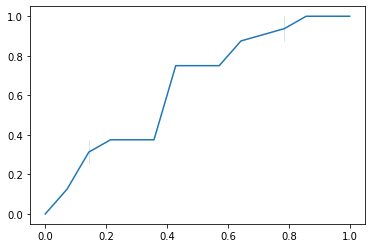

In [84]:
s = timeit.timeit()
clf = LogisticRegression(random_state=0,solver='lbfgs')
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
e = timeit.timeit()
report = metrics.classification_report(ytest,ypred)
print(report)
print('\n\n Time Taken = {}'.format(e-s))
yscore = clf.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest,yscore,pos_label=1)
sns.lineplot(fpr,tpr)

# NAIVE BAYES

In [80]:
def Predict(tst,train):
    m = len(train)
    y = len(train[train['T']=='T'])
    n = len(train[train['T']=='F'])
    y1 = len(train[(train['YELLOW']==tst['YELLOW']) & (train['T']=='T' )])/y
    n1 = len(train[(train['YELLOW']==tst['YELLOW']) & (train['T']=='F' )])/n
    y2 = len(train[(train['SMALL']==tst['SMALL']) & (train['T']=='T' )])/y
    n2 = len(train[(train['SMALL']==tst['SMALL']) & (train['T']=='F' )])/n
    y3 = len(train[(train['STRETCH']==tst['STRETCH']) & (train['T']=='T' )])/y
    n3 = len(train[(train['STRETCH']==tst['STRETCH']) & (train['T']=='F' )])/n
    y4 = len(train[(train['ADULT']==tst['ADULT']) & (train['T']=='T' )])/y
    n4 = len(train[(train['ADULT']==tst['ADULT']) & (train['T']=='F' )])/n
    
    py = (y/m)*(y1*y2*y3*y4)
    pn = (n/m)*(n1*n2*n3*n4)
    
    t = py/(py + pn)
    f = pn/(py + pn)
    
    if t >= f:
        pred = 1
    else:
        pred = 0
    
    return t,pred

              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.50      0.38      0.43         8

    accuracy                           0.64        22
   macro avg       0.59      0.58      0.58        22
weighted avg       0.62      0.64      0.62        22



 Time Taken = 0.002494400000159658


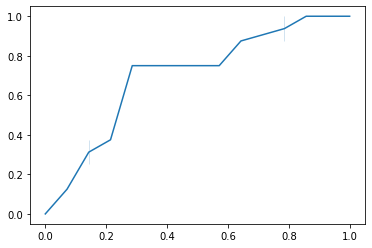

In [83]:
s = timeit.timeit()
ytest = []
ypred = []
yscore = []
for i,tst in test.iterrows():
    t,pred = Predict(tst,train)
    ypred.append(pred)
    yscore.append(t)
    if tst['T'] == 'T':
        ytest.append(1)
    else:
        ytest.append(0)
ytest = np.array(ytest)
ypred = np.array(ypred)
yscore = np.array(yscore)
e = timeit.timeit()
report = metrics.classification_report(ytest,ypred)
print(report)
print('\n\n Time Taken = {}'.format(e-s))
fpr, tpr, thresholds = metrics.roc_curve(ytest,yscore,pos_label=1)
sns.lineplot(fpr,tpr)